In [52]:
import numpy as np
import matplotlib.pyplot as plt


In [53]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [54]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))
        
    def feedforward(self, X):
        # Propagate inputs through the network
        self.hidden_sum = np.dot(X, self.weights_input_hidden)
        self.activated_hidden = sigmoid(self.hidden_sum)
        self.output_sum = np.dot(self.activated_hidden, self.weights_hidden_output)
        self.activated_output = sigmoid(self.output_sum)
        return self.activated_output
    
    def backward(self, X, y, output, learning_rate):
        # Backpropagate error
        self.output_error = y - output
        self.output_delta = self.output_error * sigmoid_derivative(output)
        
        self.hidden_error = self.output_delta.dot(self.weights_hidden_output.T)
        self.hidden_delta = self.hidden_error * sigmoid_derivative(self.activated_hidden)
        
        # Update weights
        self.weights_hidden_output += self.activated_hidden.T.dot(self.output_delta) * learning_rate
        self.weights_input_hidden += X.T.dot(self.hidden_delta) * learning_rate
        
    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, output, learning_rate)


In [55]:
def f1(x):
    return x * np.sin(6 * np.pi * x) * np.exp(-x**2)

def f2(x):
    return np.exp(-x**2) * np.arctan(x) * np.sin(4 * np.pi * x)

In [56]:
def generate_dataset(func, num_samples):
    x_values = np.random.uniform(-1, 1, num_samples)
    y_values = func(x_values)
    return x_values, y_values

In [57]:
def split_dataset(x, y, train_ratio=0.7):
    num_train = int(len(x) * train_ratio)
    train_indices = np.random.choice(len(x), num_train, replace=False)
    test_indices = np.setdiff1d(np.arange(len(x)), train_indices)
    x_train, y_train = x[train_indices], y[train_indices]
    x_test, y_test = x[test_indices], y[test_indices]
    return x_train, y_train, x_test, y_test

In [58]:
sample_sizes = np.arange(20, 201, 20)
num_hidden_nodes = 3

epochs = 10000
learning_rate = 0.01

In [59]:
training_errors_f1 = []
testing_errors_f1 = []
training_errors_f2 = []
testing_errors_f2 = []


In [60]:
for sample_size in sample_sizes:
    # Generate datasets for both mappings
    x_train_f1, y_train_f1 = generate_dataset(f1, sample_size)
    x_test_f1, y_test_f1 = generate_dataset(f1, 300)  # 30% for testing
    x_train_f2, y_train_f2 = generate_dataset(f2, sample_size)
    x_test_f2, y_test_f2 = generate_dataset(f2, 300)  # 30% for testing
    
    # Normalize the data (optional)
    x_train_f1_normalized = (x_train_f1 - np.mean(x_train_f1)) / np.std(x_train_f1)
    x_test_f1_normalized = (x_test_f1 - np.mean(x_test_f1)) / np.std(x_test_f1)
    x_train_f2_normalized = (x_train_f2 - np.mean(x_train_f2)) / np.std(x_train_f2)
    x_test_f2_normalized = (x_test_f2 - np.mean(x_test_f2)) / np.std(x_test_f2)
    
    # Initialize and train the neural network for mapping 1
    nn_f1 = NeuralNetwork(1, num_hidden_nodes, 1)
    nn_f1.train(x_train_f1_normalized.reshape(-1, 1), y_train_f1.reshape(-1, 1), epochs, learning_rate)
    
    # Calculate training and testing errors for mapping 1
    train_predictions_f1 = nn_f1.feedforward(x_train_f1_normalized.reshape(-1, 1)).flatten()
    train_error_f1 = np.mean((y_train_f1 - train_predictions_f1)**2)
    training_errors_f1.append(train_error_f1)
    
    test_predictions_f1 = nn_f1.feedforward(x_test_f1_normalized.reshape(-1, 1)).flatten()
    test_error_f1 = np.mean((y_test_f1 - test_predictions_f1)**2)
    testing_errors_f1.append(test_error_f1)
    
    # Initialize and train the neural network for mapping 2
    nn_f2 = NeuralNetwork(1, num_hidden_nodes, 1)
    nn_f2.train(x_train_f2_normalized.reshape(-1, 1), y_train_f2.reshape(-1, 1), epochs, learning_rate)
    
    # Calculate training and testing errors for mapping 2
    train_predictions_f2 = nn_f2.feedforward(x_train_f2_normalized.reshape(-1, 1)).flatten()
    train_error_f2 = np.mean((y_train_f2 - train_predictions_f2)**2)
    training_errors_f2.append(train_error_f2)
    
    test_predictions_f2 = nn_f2.feedforward(x_test_f2_normalized.reshape(-1, 1)).flatten()
    test_error_f2 = np.mean((y_test_f2 - test_predictions_f2)**2)
    testing_errors_f2.append(test_error_f2)

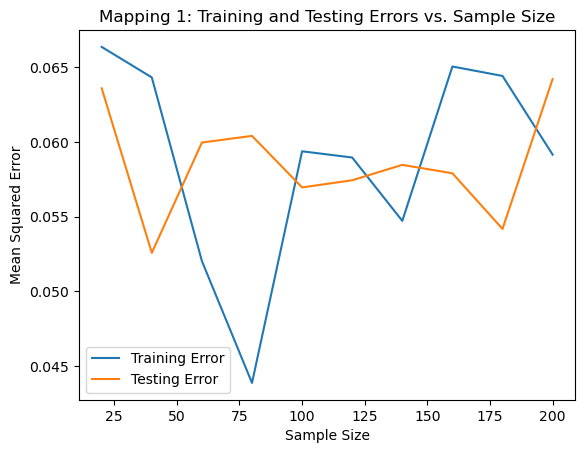

In [61]:
plt.plot(sample_sizes, training_errors_f1, label='Training Error')
plt.plot(sample_sizes, testing_errors_f1, label='Testing Error')
plt.title('Mapping 1: Training and Testing Errors vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


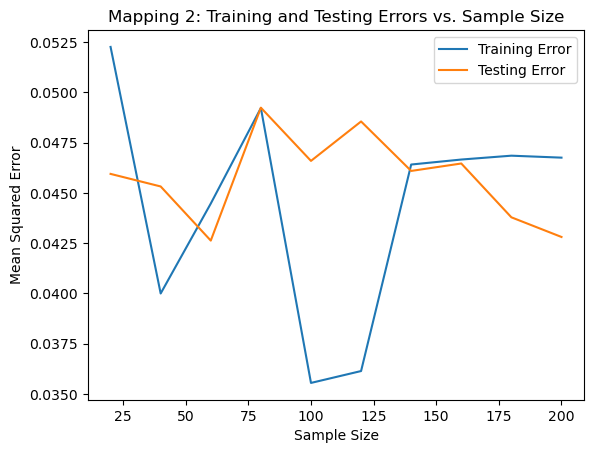

In [62]:
plt.plot(sample_sizes, training_errors_f2, label='Training Error')
plt.plot(sample_sizes, testing_errors_f2, label='Testing Error')
plt.title('Mapping 2: Training and Testing Errors vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

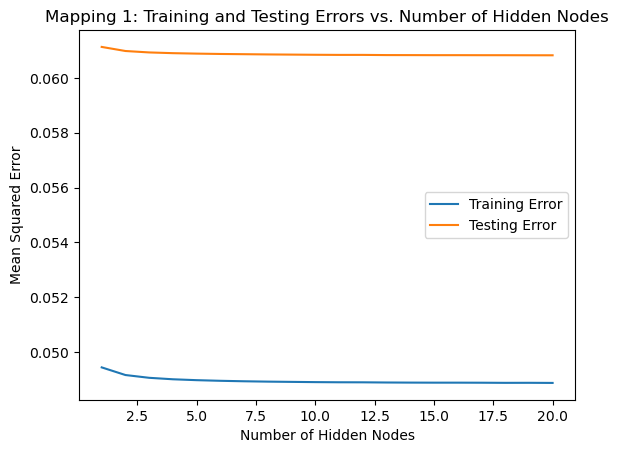

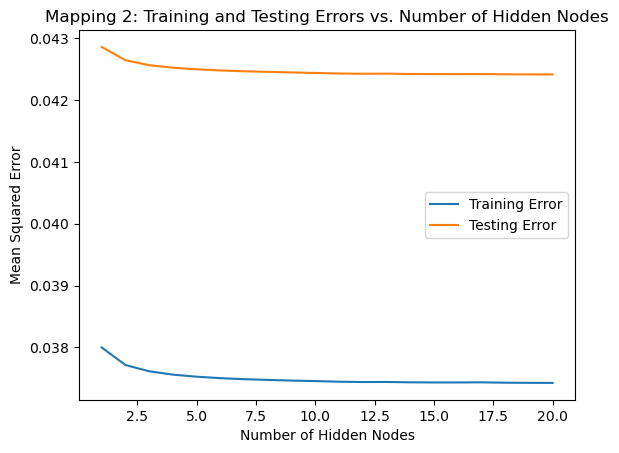

In [63]:
# Define the range of number of hidden nodes
num_hidden_nodes_range = np.arange(1, 21)

# Fix the number of training samples
num_training_samples = 100

# Generate datasets for the given mappings
x_train_f1, y_train_f1 = generate_dataset(f1, num_training_samples)
x_test_f1, y_test_f1 = generate_dataset(f1, 300)  # Fixed testing data
x_train_f2, y_train_f2 = generate_dataset(f2, num_training_samples)
x_test_f2, y_test_f2 = generate_dataset(f2, 300)  # Fixed testing data

# Normalize the data (optional)
x_train_f1_normalized = (x_train_f1 - np.mean(x_train_f1)) / np.std(x_train_f1)
x_test_f1_normalized = (x_test_f1 - np.mean(x_test_f1)) / np.std(x_test_f1)
x_train_f2_normalized = (x_train_f2 - np.mean(x_train_f2)) / np.std(x_train_f2)
x_test_f2_normalized = (x_test_f2 - np.mean(x_test_f2)) / np.std(x_test_f2)

# Initialize lists to store training and testing errors for each number of hidden nodes
training_errors_f1_fixed_samples = []
testing_errors_f1_fixed_samples = []
training_errors_f2_fixed_samples = []
testing_errors_f2_fixed_samples = []

# Define the number of epochs for training
epochs = 10000
learning_rate = 0.01

# Iterate over number of hidden nodes
for num_hidden_nodes in num_hidden_nodes_range:
    # Initialize and train the neural network for mapping 1
    nn_f1 = NeuralNetwork(1, num_hidden_nodes, 1)
    nn_f1.train(x_train_f1_normalized.reshape(-1, 1), y_train_f1.reshape(-1, 1), epochs, learning_rate)
    
    # Calculate training and testing errors for mapping 1
    train_predictions_f1 = nn_f1.feedforward(x_train_f1_normalized.reshape(-1, 1)).flatten()
    train_error_f1 = np.mean((y_train_f1 - train_predictions_f1)**2)
    training_errors_f1_fixed_samples.append(train_error_f1)
    
    test_predictions_f1 = nn_f1.feedforward(x_test_f1_normalized.reshape(-1, 1)).flatten()
    test_error_f1 = np.mean((y_test_f1 - test_predictions_f1)**2)
    testing_errors_f1_fixed_samples.append(test_error_f1)
    
    # Initialize and train the neural network for mapping 2
    nn_f2 = NeuralNetwork(1, num_hidden_nodes, 1)
    nn_f2.train(x_train_f2_normalized.reshape(-1, 1), y_train_f2.reshape(-1, 1), epochs, learning_rate)
    
    # Calculate training and testing errors for mapping 2
    train_predictions_f2 = nn_f2.feedforward(x_train_f2_normalized.reshape(-1, 1)).flatten()
    train_error_f2 = np.mean((y_train_f2 - train_predictions_f2)**2)
    training_errors_f2_fixed_samples.append(train_error_f2)
    
    test_predictions_f2 = nn_f2.feedforward(x_test_f2_normalized.reshape(-1, 1)).flatten()
    test_error_f2 = np.mean((y_test_f2 - test_predictions_f2)**2)
    testing_errors_f2_fixed_samples.append(test_error_f2)

# Plotting the results for mapping 1
plt.plot(num_hidden_nodes_range, training_errors_f1_fixed_samples, label='Training Error')
plt.plot(num_hidden_nodes_range, testing_errors_f1_fixed_samples, label='Testing Error')
plt.title('Mapping 1: Training and Testing Errors vs. Number of Hidden Nodes')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Plotting the results for mapping 2
plt.plot(num_hidden_nodes_range, training_errors_f2_fixed_samples, label='Training Error')
plt.plot(num_hidden_nodes_range, testing_errors_f2_fixed_samples, label='Testing Error')
plt.title('Mapping 2: Training and Testing Errors vs. Number of Hidden Nodes')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
